In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.special as scisp
from scipy.constants import h, c, hbar, u 
from scipy.optimize import curve_fit

In [2]:
#From the top, a clean rewrite of the entire ANHARMONIC code.
#Hoping the pretentious naming somehow changes the outcome.
#Leave nothing unexplained, know every bug (in theory...).
#Keep clean and crystal clear, Cross.

# CONVERTIONS

In [3]:
#Kilograms [kg] <-> Electron mass [m_e] 
kg_to_me_convert = 1.0977683828808e30 #[kg] -> [m_e]
me_to_kg_convert = 1./kg_to_me_convert #[m_e] -> [kg]
#print(me_to_kg_covert)

#Meters [m] <-> Bohrs [Bohrs]
m_to_bohr_convert = 18897161646.321 #[m] -> [Bohrs]
bohr_to_m_convert = 1./m_to_bohr_convert #[Bohrs] -> [m]
#print(bohr_to_m_convert)

#Joules [J] <-> Hartrees [Hartree]
j_to_hartree_convert = 2.2937104486906E+17 #[J] -> [Hartree]
hartree_to_j_convert = 1./j_to_hartree_convert #[Hartree] -> [J]
#print(hartree_to_j_convert)

## HARMONICS

## HARMONICS - POTENTIAL CURVE

In [4]:
#The Reduced Mass - DEFAULT UNITS [kg]
def mu(m_A, m_B):
    mu = ((m_A * m_B) / (m_A + m_B)) * u
    return mu

In [5]:
#Reduced Mass - H2
#SI - [kg]
mu_H2_kg = mu(1, 1)
print('The SI reduced mass for H2 is', mu_H2_kg, '[kg]')

#ATOMIC - [m_e]
mu_H2_me = mu_H2_kg * kg_to_me_convert
print('The ATOMIC reduced mass for H2 is', mu_H2_me, '[m_e]')

The SI reduced mass for H2 is 8.3026952e-28 [kg]
The ATOMIC reduced mass for H2 is 911.443628325618 [m_e]


In [6]:
#Angular Frequency in [Hz] given [cm^-1]
def omega_Hz(omega_cm):
    lambda_ = 1./(omega_cm / 100)
    omega_Hz = (2 * np.pi * c) / lambda_
    return omega_Hz

In [7]:
#Angular Frequency - H2
#Converting wavenumbers [cm^-1] to hertz [Hz]
#Obtained from paper
omega_wn_H2 = 4401
omega_Hz_H2 = omega_Hz(omega_wn_H2)
print('The angular frequency for H2 is', omega_Hz_H2, 'Hz')

The angular frequency for H2 is 82899505477.26263 Hz


In [8]:
#The Force Constant - DEFAULT UNITS:[Nm^-1]
def k(omega_Hz, mu):
    k = (omega_Hz**2) * mu
    return k

In [9]:
#Force Constant [Nm^-1] - H2
#SI
k_H2 = k(omega_Hz_H2, mu_H2_kg)
print('The force constant for H2 is', k_H2, 'Nm^-1')

#ATOMIC
k_H2_ATOMIC = k_H2 * (j_to_hartree_convert/m_to_bohr_convert**2)
print('The ATOMIC force constant for H2 is', k_H2_ATOMIC, '[Hartree]/[Bohr]**2')

The force constant for H2 is 5.705884476795815e-06 Nm^-1
The ATOMIC force constant for H2 is 3.6649530158218645e-09 [Hartree]/[Bohr]**2


In [10]:
#Vibrational Levels
def v_range(v_min, v_max):
    increment = v_max + 1
    v_range = np.linspace(v_min, v_max, increment)
    return v_range

In [11]:
#Vibrational levels - H2
v_H2 = v_range(0, 6)
print('The selected vibrational levels are v=',v_H2)

The selected vibrational levels are v= [0. 1. 2. 3. 4. 5. 6.]


In [12]:
#Energy Eigenvalues - DEFAULT UNITS:[J]
def E_v(omega_Hz, v):
    E_v = hbar * (v + 0.5) * omega_Hz
    return E_v

In [13]:
#Energy Eigenvalues
#SI - [J]
E_v_H2_J = E_v(omega_Hz_H2, v_H2)
print('The SI Energy Eigenvalues are',E_v_H2_J,'[J]')

#ATOMIC - [Hartree]
E_v_H2_H = E_v_H2_J * j_to_hartree_convert
print('The ATOMIC Energy Eigenvalues are',E_v_H2_H,'[Hartree]')

The SI Energy Eigenvalues are [4.37117404e-24 1.31135221e-23 2.18558702e-23 3.05982183e-23
 3.93405663e-23 4.80829144e-23 5.68252625e-23] [J]
The ATOMIC Energy Eigenvalues are [1.00262076e-06 3.00786227e-06 5.01310378e-06 7.01834529e-06
 9.02358680e-06 1.10288283e-05 1.30340698e-05] [Hartree]


In [14]:
#Potential Well intercept points - DEFAULT UNITS:[m]
def E_intercept(omega_Hz, k, v):
    intercept = np.sqrt((2 * hbar * omega_Hz * (v + 0.5)) / k)
    return intercept

In [15]:
#Intercept Points - H2
#SI - [m]
intercept_H2_m = E_intercept(omega_Hz_H2, k_H2, v_H2)
print('The SI intercept positions are', intercept_H2_m, '[m]')

#ATOMIC - [Bohr]
intercept_H2_B = intercept_H2_m * m_to_bohr_convert
print('The ATOMIC intercept positions are', intercept_H2_B, '[Bohr]')

The SI intercept positions are [1.23780593e-09 2.14394276e-09 2.76781821e-09 3.27492667e-09
 3.71341780e-09 4.10533784e-09 4.46297276e-09] [m]
The ATOMIC intercept positions are [23.39101878 40.51443297 52.30390806 61.8868186  70.17305634 77.57923276
 84.3375176 ] [Bohr]


In [16]:
#Internuclear Seperation - DEFAULT UNITS:[m]
def r_sep(omega_Hz, k, no, v_range): #no., is an arbitrary value that controls resolution
    x_plus = max(np.sqrt((2 * hbar * omega_Hz * (v_range + 0.5)) / k))
    x_minus = -1 * x_plus
    r_sep = np.linspace(x_minus, x_plus, no)
    return r_sep

In [17]:
#Internuclear Seperation - H2
#SI - [m]
r_sep_H2_m = r_sep(omega_Hz_H2, k_H2, 100, v_H2)
#print('The SI Internuclear seperation is', r_sep_H2_m, '[m]')

#ATOMIC - [Bohr]
r_sep_H2_B = r_sep_H2_m * m_to_bohr_convert
#print('The SI Internuclear seperation is', r_sep_H2_B, '[m]')

In [18]:
#Potential Energy - DEFAULT UNITS:[J]
def V_r(k, r_sep_m):
    V_r = 0.5 * k * (r_sep_m**2)
    return V_r

In [19]:
#Potential Energy - H2
#SI - [J]
V_r_H2_J = V_r(k_H2, r_sep_H2_m)
#print('The SI potential energy points are', V_r_H2_J, '[J]')

#ATOMIC - [Hartree]
V_r_H2_H = V_r_H2_J * j_to_hartree_convert
#print('The ATOMIC potential energy points are', V_r_H2_H, '[Hartree]')

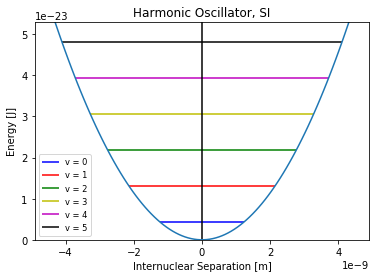

In [20]:
#Plotting the Harmonic Oscillator - SI
plt.plot(r_sep_H2_m, V_r_H2_J)
plt.hlines(E_v_H2_J[0], (-1 * intercept_H2_m[0]), intercept_H2_m[0], 'b',label = 'v = 0')
plt.hlines(E_v_H2_J[1], (-1 * intercept_H2_m[1]), intercept_H2_m[1], 'r',label = 'v = 1')
plt.hlines(E_v_H2_J[2], (-1 * intercept_H2_m[2]), intercept_H2_m[2], 'g', label = 'v = 2')
plt.hlines(E_v_H2_J[3], (-1 * intercept_H2_m[3]), intercept_H2_m[3], 'y', label = 'v = 3')
plt.hlines(E_v_H2_J[4], (-1 * intercept_H2_m[4]), intercept_H2_m[4], 'm', label = 'v = 4')
plt.hlines(E_v_H2_J[5], (-1 * intercept_H2_m[5]), intercept_H2_m[5], label = 'v = 5')

plt.vlines(0, 0, max(V_r_H2_J), 'k')
plt.ylim(0, (E_v_H2_J[5] * 1.1))

plt.legend(loc = 'best', fontsize = 'small')
plt.xticks(rotation=0)

plt.title('Harmonic Oscillator, SI')
plt.xlabel('Internuclear Separation [m]')
plt.ylabel('Energy [J]')
plt.show()

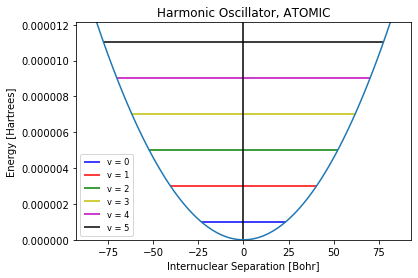

In [21]:
#Plotting the Harmonic Oscillator - ATOMIC
plt.plot(r_sep_H2_B, V_r_H2_H)
plt.hlines(E_v_H2_H[0], (-1 * intercept_H2_B[0]), intercept_H2_B[0], 'b',label = 'v = 0')
plt.hlines(E_v_H2_H[1], (-1 * intercept_H2_B[1]), intercept_H2_B[1], 'r',label = 'v = 1')
plt.hlines(E_v_H2_H[2], (-1 * intercept_H2_B[2]), intercept_H2_B[2], 'g', label = 'v = 2')
plt.hlines(E_v_H2_H[3], (-1 * intercept_H2_B[3]), intercept_H2_B[3], 'y', label = 'v = 3')
plt.hlines(E_v_H2_H[4], (-1 * intercept_H2_B[4]), intercept_H2_B[4], 'm', label = 'v = 4')
plt.hlines(E_v_H2_H[5], (-1 * intercept_H2_B[5]), intercept_H2_B[5], label = 'v = 5')

plt.vlines(0, 0, max(V_r_H2_H), 'k')
plt.ylim(0, (E_v_H2_H[5] * 1.1))

plt.legend(loc = 'best', fontsize = 'small')
plt.xticks(rotation=0)

plt.title('Harmonic Oscillator, ATOMIC')
plt.xlabel('Internuclear Separation [Bohr]')
plt.ylabel('Energy [Hartrees]')
plt.show()

In [22]:
#Testing is the best thing - H2
#Seperation between energy levels [cm^-1], if given Hartrees
#Should have the same value as the original omega_Hz
print('Original wavenumber is', omega_wn_H2, '[cm^-1]')

def seperation_test(E_v, E_v_minus1):
    seperation_test = ((E_v - E_v_minus1) * hartree_to_j_convert) /(h * c * 100)
    return seperation_test

###########################################################
TEST_0_to_1 = seperation_test(E_v_H2_H[1], E_v_H2_H[0])
TEST_1_to_2 = seperation_test(E_v_H2_H[2], E_v_H2_H[1])
TEST_2_to_3 = seperation_test(E_v_H2_H[3], E_v_H2_H[2])
TEST_3_to_4 = seperation_test(E_v_H2_H[4], E_v_H2_H[3])
TEST_4_to_5 = seperation_test(E_v_H2_H[5], E_v_H2_H[4])

print('The wavenumbers between levels are', TEST_0_to_1, TEST_1_to_2, TEST_2_to_3, TEST_3_to_4, TEST_4_to_5, '[cm^-1]')

Original wavenumber is 4401 [cm^-1]
The wavenumbers between levels are 0.44010000000000005 0.44010000000000005 0.44010000000000016 0.4400999999999998 0.44010000000000016 [cm^-1]


## HARMONICS - WAVEFUNCTIONS

In [23]:
#Made up of three components:
#     1 - Normalization Constant
#     2 - Hermite(z), (in this case z = alpha * x)
#     3 - Exponent^(displacement**2/2)

In [24]:
#Wavefunction parameter: alpha - DEFAULT UNITS:[m^-1]
def alpha(mu, k):
    alpha = ((mu * k)/ (hbar**2))**0.25
    return alpha

In [25]:
#Wavefunction parameter: alpha - H2
#SI - [m^-1]
alpha_H2 = alpha(mu_H2_kg, k_H2)
print('Alpha for H2 is', alpha_H2, 'm^-1')

Alpha for H2 is 807881085.6393586 m^-1


In [26]:
#Wavefunction parameter: Normalization constant [m^-0.5]
def Norm_v(alpha, v):
    Norm_v = (alpha / ((2**v) * m.factorial(v) * (np.pi**0.5)))**0.5
    return Norm_v

In [27]:
#Wavefunction parameter: Normalization constant 
#SI - [m^-0.5]
Norm_v_H2_0 = Norm_v(alpha_H2, v_H2[0])
Norm_v_H2_1 = Norm_v(alpha_H2, v_H2[1])
Norm_v_H2_2 = Norm_v(alpha_H2, v_H2[2])
Norm_v_H2_3 = Norm_v(alpha_H2, v_H2[3])
Norm_v_H2_4 = Norm_v(alpha_H2, v_H2[4])
Norm_v_H2_5 = Norm_v(alpha_H2, v_H2[5])

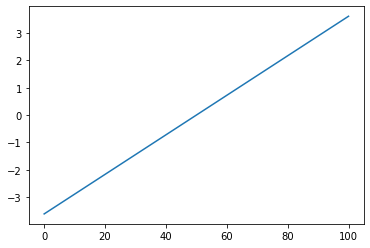

In [28]:
#Hermite Polynomial 
#Theres a built in function to do this
alphax_H2 = alpha_H2 * r_sep_H2_m

#Testing the shape
plt.plot(np.linspace(0, len(alphax_H2), len(alphax_H2)),alphax_H2)


H2_Hermite_0 = scisp.eval_hermite(0, alphax_H2)
H2_Hermite_1 = scisp.eval_hermite(1, alphax_H2)
H2_Hermite_2 = scisp.eval_hermite(2, alphax_H2)
H2_Hermite_3 = scisp.eval_hermite(3, alphax_H2)
H2_Hermite_4 = scisp.eval_hermite(4, alphax_H2)
H2_Hermite_5 = scisp.eval_hermite(5, alphax_H2)

In [29]:
#Wavefunction - DEFAULT UNITS: [m^-0.5]
def psi(Norm_v, Hermite, alpha, x):
    psi = Norm_v * Hermite * np.exp(-(alpha**2 * x**2) / 2)
    return psi

In [30]:
#Wavefunction
#N procedure is designed to make in dimensionless
psi_H2_0 = psi(Norm_v_H2_0, H2_Hermite_0, alpha_H2, r_sep_H2_m)
Npsi_H2_0 = psi_H2_0 / (alpha_H2**0.5)

psi_H2_1 = psi(Norm_v_H2_1, H2_Hermite_1, alpha_H2, r_sep_H2_m)
Npsi_H2_1 = psi_H2_1 / (alpha_H2**0.5)

psi_H2_2 = psi(Norm_v_H2_2, H2_Hermite_2, alpha_H2, r_sep_H2_m)
Npsi_H2_2 = psi_H2_2 / (alpha_H2**0.5)

psi_H2_3 = psi(Norm_v_H2_3, H2_Hermite_3, alpha_H2, r_sep_H2_m)
Npsi_H2_3 = psi_H2_3 / (alpha_H2**0.5)

psi_H2_4 = psi(Norm_v_H2_4, H2_Hermite_4, alpha_H2, r_sep_H2_m)
Npsi_H2_4 = psi_H2_4 / (alpha_H2**0.5)

psi_H2_5 = psi(Norm_v_H2_5, H2_Hermite_5, alpha_H2, r_sep_H2_m)
Npsi_H2_5 = psi_H2_5 / (alpha_H2**0.5)

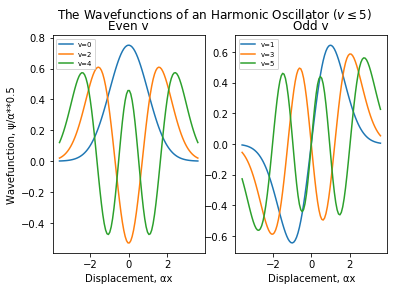

In [31]:
#Plotting the Wavefunctions - H2
f,(ax, ax2) = plt.subplots(1, 2, facecolor = 'w')

ax.plot(alphax_H2, Npsi_H2_0, label = 'v=0')
ax2.plot(alphax_H2, Npsi_H2_1, label = 'v=1')
ax.plot(alphax_H2, Npsi_H2_2, label = 'v=2')
ax2.plot(alphax_H2, Npsi_H2_3, label = 'v=3')
ax.plot(alphax_H2, Npsi_H2_4, label = 'v=4')
ax2.plot(alphax_H2, Npsi_H2_5, label = 'v=5')

legend = ax.legend(loc = 'upper left', fontsize = 'x-small')
legend = ax2.legend(loc = 'upper left', fontsize = 'x-small')

f.suptitle('The Wavefunctions of an Harmonic Oscillator ($v\leq5$)')
ax.set_title('Even v')
ax2.set_title('Odd v')
ax.set_ylabel('Wavefunction, \u03C8/\u03B1**0.5')
ax.set_xlabel('Displacement, \u03B1x')
ax2.set_xlabel('Displacement, \u03B1x')

plt.show()

In [32]:
#HARMONIC - POTENTIAL CURVE + WAVEFUNCTIONS

In [33]:
#Converting wavefunctions to Hartrees
psi_NEW_H2_0 = (psi_H2_0 * h * c) * j_to_hartree_convert
psi_NEW_H2_1 = (psi_H2_1 * h * c) * j_to_hartree_convert
psi_NEW_H2_2 = (psi_H2_2 * h * c) * j_to_hartree_convert
psi_NEW_H2_3 = (psi_H2_3 * h * c) * j_to_hartree_convert
psi_NEW_H2_4 = (psi_H2_4 * h * c) * j_to_hartree_convert
psi_NEW_H2_5 = (psi_H2_5 * h * c) * j_to_hartree_convert

#Converting Displacement to Bohrs
disp = r_sep_H2_m * m_to_bohr_convert

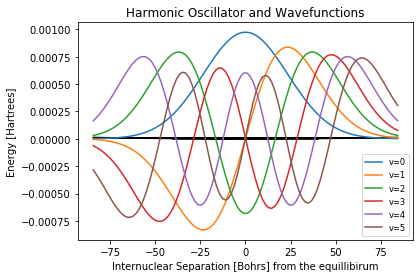

In [34]:
#Not the most efficient means of plotting - CONSIDER REFORMATTING
plt.plot(r_sep_H2_B, V_r_H2_H, 'k')
plt.hlines(E_v_H2_H[0], (-1 * intercept_H2_B[0]), intercept_H2_B[0])
plt.plot(disp, (psi_NEW_H2_0+E_v_H2_H[0]), label = 'v=0')
plt.hlines(E_v_H2_H[1], (-1 * intercept_H2_B[1]), intercept_H2_B[1])
plt.plot(disp, (psi_NEW_H2_1+E_v_H2_H[1]), label = 'v=1')
plt.hlines(E_v_H2_H[2], (-1 * intercept_H2_B[2]), intercept_H2_B[2])
plt.plot(disp, (psi_NEW_H2_2+E_v_H2_H[2]), label = 'v=2')
plt.hlines(E_v_H2_H[3], (-1 * intercept_H2_B[3]), intercept_H2_B[3])
plt.plot(disp, (psi_NEW_H2_3+E_v_H2_H[3]), label = 'v=3')
plt.hlines(E_v_H2_H[4], (-1 * intercept_H2_B[4]), intercept_H2_B[4])
plt.plot(disp, (psi_NEW_H2_4+E_v_H2_H[4]), label = 'v=4')
plt.hlines(E_v_H2_H[5], (-1 * intercept_H2_B[5]), intercept_H2_B[5])
plt.plot(disp, (psi_NEW_H2_5+E_v_H2_H[5]), label = 'v=5')
plt.legend(loc = 'best', fontsize = 'small')

plt.title('Harmonic Oscillator and Wavefunctions')
plt.xlabel('Internuclear Separation [Bohrs] from the equillibirum')
plt.ylabel('Energy [Hartrees]')
plt.show()

# ANHARMONIC (TOSH)

## ANHARMONIC - APPROXIMATING THE POTENTIAL CURVE

In [35]:
#To find essential parameters, you must first approximate potential cuvre
#Done via experimental data given in paper "64KoWoXX"

In [36]:
#Defining a function to give me the smallest value in an array
def smallest(arr, n):
    min = arr[0]
    for i in range(1, n):
        if arr[i] < min:
            min = arr[i]
    return min

In [37]:
#Mass Weighted Cartesian Coordinates - DEFAULT UNITS:[m]*[kg]**0.5 if given [m] and [kg]
def mwc(mu, x):
    mwc = np.sqrt(mu) * x
    return mwc

In [38]:
#Distance [Bohrs], from 64KoWoXX
Exp_H2_r_Bohr = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1.,  1.1, 1.2, 1.3, 1.35, 1.39, 1.4, 1.401, 1.4011, 1.41, 1.45, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.6, 3.7]



#Mass Weighting the distance
Exp_H2_MWC = np.divide(Exp_H2_r_Bohr, (1/mu_H2_me))
print('The experimental MWC in atomic units are', Exp_H2_MWC[19], '[Bohr]*[m_e]**0.5')

The experimental MWC in atomic units are 1285.1355159391212 [Bohr]*[m_e]**0.5


In [39]:
#Energy [Hartrees], from 64KoWoXX
Exp_H2_E_Hartree = [-0.1202028, -0.3509282, -0.5266270, -0.6627583, -0.7696253, -0.8543531, -0.9220185, -0.9763287, -1.0200487, -1.0836362, -1.1245331, -1.1500512, -1.1649294, -1.1723414, -1.1739581, -1.1744472, -1.1744699, -1.1744701, -1.1744701, -1.1744556, -1.1740513, -1.1728492, -1.1685773, -1.1624521, -1.1550616, -1.1468425, -1.1381236, -1.1291528, -1.1201190, -1.1111659, -1.1024035, -1.0939149, -1.0857627, -1.0779927, -1.0706404, -1.0637259, -1.0572607, -1.0512547, -1.0457057, -1.0406020, -1.0359419, -1.0278471, -1.0243742]
E_H2_H_n = len(Exp_H2_E_Hartree)
Exp_H2_H = Exp_H2_E_Hartree

#Centering around 0
Exp_H2_E_H_min = smallest(Exp_H2_E_Hartree, E_H2_H_n) #Need the smallest value to centre graph on 0
#print(Exp_H2_E_H_min)

#print(H2_E_paper_min)
Exp_H2_H = [x-Exp_H2_E_H_min for x in Exp_H2_E_Hartree]
#print('The experimental energies in atomic units are', Exp_H2_H, '[Hartrees]')

The constants: eta_II = 9.998389041637484e-07 , eta_III = -3.2115899817088923e-09 eta_IIII = 3.6465360626736e-12 x0 = 1254.5414726864742


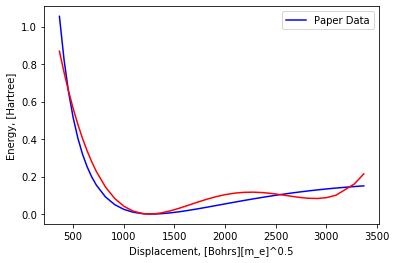

In [47]:
#Fitting the potential curve
def vfit(x, k2, k3, k4, x0):
    return (0.5*k2*(x-x0)**2)+((1/6)*k3*(x-x0)**3)+((1/24)*k4*(x-x0)**4)

#Obtaining the Constants
p0=(1, 1, 1, 1000) #Inital Guesses
popt, pcov = curve_fit(vfit, Exp_H2_MWC, Exp_H2_H, p0=p0, maxfev=400000)

#Defining the yfit
Exp_H2_MWC = np.array(Exp_H2_MWC)
yfit = vfit(Exp_H2_MWC, popt[0], popt[1], popt[2], popt[3])


plt.plot(Exp_H2_MWC, Exp_H2_H, 'b-', label='Paper Data')
plt.plot(Exp_H2_MWC, yfit, 'r-')#,label='fit: eta_II=%5.3f, eta_III=%5.3f, k4=%5.3f, x0=%5.3f' % tuple(popt))
print("The constants: eta_II =", popt[0], ", eta_III =", popt[1], 'eta_IIII =', popt[2], 'x0 =', popt[3])

#Alternative means to plot:
#plt.plot(H2_r_MWC, vfit(H2_r_MWC, *popt), 'r-',label='fit: k2=%5.3f, k3=%5.3f, k4=%5.3f, x0=%5.3f' % tuple(popt))

plt.legend()
plt.xlabel('Displacement, [Bohrs][m_e]^0.5')
plt.ylabel('Energy, [Hartree]')
plt.show()

## ANHARMONIC - FINDING THE TOSH OPERATOR

In [48]:
#Eta_II
#ATOMIC - [Hartree]/[m_e]*[Bohr]**2
eta_II_ATOMIC = popt[0]
print("The ATOMIC eta_II =", eta_II_ATOMIC, "[Hartree]/[m_e]*[Bohr]**2")

#ATOMIC - FORCE CONSTANT COMPARISONS
print('The ATOMIC force constant for H2 is', k_H2_ATOMIC, '[Hartree]/[Bohr]**2')

#SI - [J]/[kg]*[m]**2
eta_II_SI = eta_II_ATOMIC * (hartree_to_j_convert/(me_to_kg_convert * bohr_to_m_convert**2))
print("The SI eta_II =", eta_II_SI, "[J]/[kg]*[m]**2 or [s]**-2")

The ATOMIC eta_II = 9.998389041637484e-07 [Hartree]/[m_e]*[Bohr]**2
The ATOMIC force constant for H2 is 3.6649530158218645e-09 [Hartree]/[Bohr]**2
The SI eta_II = 1.708816043642374e+27 [J]/[kg]*[m]**2 or [s]**-2


In [49]:
#Eta_III
#ATOMIC - [Hartree]/[m_e]**1.5*[Bohr]**3
eta_III_ATOMIC = popt[1]
print("The ATOMIC eta_II =", eta_III_ATOMIC, "[Hartree]/[m_e]**1.5*[Bohr]**3")

#SI - [J]/[kg]**1.5*[m]**3
eta_III_SI = eta_III_ATOMIC * (hartree_to_j_convert/((me_to_kg_convert**1.5) * (bohr_to_m_convert**3)))
print("The SI eta_III =", eta_III_SI, "[J]/[kg]**1.5*[m]**3")

The ATOMIC eta_II = -3.2115899817088923e-09 [Hartree]/[m_e]**1.5*[Bohr]**3
The SI eta_III = -1.086769179041034e+50 [J]/[kg]**1.5*[m]**3


In [50]:
#Angular Frequency via eta_II
#SI - [m]^-1
omega_eta_m = np.sqrt(eta_II_SI)/(2 * np.pi * c)
print("SI Omega is", omega_eta_m, "[m]^-1 ")

#Testing not messing around with the conversions
omega_test_Atomic = np.sqrt(eta_II_ATOMIC)/(2 * np.pi * 137)
print("The ATOMIC test Omega is", omega_test_Atomic, "[Bohr]^-1")

#ATOMIC - [Bohr]^-1
omega_eta_bohr = omega_eta_m * 1/m_to_bohr_convert
print("ATOMIC Omega is", omega_eta_bohr, "[Bohr]^-1")

SI Omega is 21945.58110318377 [m]^-1 
The ATOMIC test Omega is 1.161621335592936e-06 [Bohr]^-1
ATOMIC Omega is 1.1613162608182617e-06 [Bohr]^-1


In [51]:
#Sigma AKA the shift
#SI - [m]*[kg]**0.5
sigma_H2_SI = (-5/12) * (eta_III_SI/omega_eta_m**3)
sigma_H2_SI = ((sigma_H2_SI * hbar)/(c**3)) 
print("SI Sigma is", sigma_H2_SI, 'Units: [m]*[kg]**0.5')

#ATOMIC TEST
sigma_H2_atomictest = (-5/12) * (eta_III_ATOMIC/omega_test_Atomic**3)
#Units are pretty wild estimating it as; [H]**.5/([B]*[m_e]*[a.u. Seconds])
print("Test ATOMIC Sigma is", sigma_H2_atomictest)

#ATOMIC - [Bohr]*[m_e]**0.5
sigma_H2_ATOMIC = sigma_H2_SI * m_to_bohr_convert * kg_to_me_convert**0.5 *0.01
print("ATOMIC Sigma is", sigma_H2_ATOMIC,"[Bohr]*[m_e]**0.5")

SI Sigma is 1.6768679387222047e-23 Units: [m]*[kg]**0.5
Test ATOMIC Sigma is 853719325.010518
ATOMIC Sigma is 3.320097200324769 [Bohr]*[m_e]**0.5


In [52]:
#Mass Weighted Coordinates
#ATOMIC - [Bohr]*[m_e]**0.5
mwc_H2_ATOMIC = mwc(mu_H2_me,r_sep_H2_B)
print('An ATOMIC Mass Weighted Coordinates is', mwc_H2_ATOMIC[0], "[Bohr]*[m_e]**0.5")

#SI
mwc_H2_SI = mwc(mu_H2_kg, r_sep_H2_m)
print('An SI Mass Weighted Coordinates is', mwc_H2_SI[0], "[m]*[kg]**0.5")

An ATOMIC Mass Weighted Coordinates is -2546.1601716446085 [Bohr]*[m_e]**0.5
An SI Mass Weighted Coordinates is -1.2859787232327484e-22 [m]*[kg]**0.5


## ANHARMONIC WAVEFUNCTIONS

In [53]:
#Made up of three components:
#     1 - Normalization Constant
#     2 - Hermite(z), (in this case z = np.sqrt(omega) * mwc)
#     3 - Exponent^((np.sqrt(omega) * (mwc-sigma))**2/2)

In [54]:
#Wavefunction Parameter: Normalization Constant
def Norm_TOSH(omega, v):
    Norm = ((omega**0.5)/(np.pi**0.5 * 2**v * m.factorial(v)))**0.5
    return Norm

In [55]:
#Using ideal values for the frequency etc
#NIdeal_H2_0 = Norm_TOSH()

In [74]:
#Wavefunction Parameter: Normalization Constant
#ATOMIC
NTOSH_ATOMIC_H2_0 = Norm_TOSH(omega_eta_bohr, v_H2[0])
NTOSH_ATOMIC_H2_1 = Norm_TOSH(omega_eta_bohr, v_H2[1])
NTOSH_ATOMIC_H2_2 = Norm_TOSH(omega_eta_bohr, v_H2[2])
NTOSH_ATOMIC_H2_3 = Norm_TOSH(omega_eta_bohr, v_H2[3])
NTOSH_ATOMIC_H2_4 = Norm_TOSH(omega_eta_bohr, v_H2[4])
NTOSH_ATOMIC_H2_5 = Norm_TOSH(omega_eta_bohr, v_H2[5])
print('The ATOMIC Normalization Constants are:', NTOSH_ATOMIC_H2_0, NTOSH_ATOMIC_H2_1, NTOSH_ATOMIC_H2_2, NTOSH_ATOMIC_H2_3, NTOSH_ATOMIC_H2_4, NTOSH_ATOMIC_H2_5)

#SI
#NTOSH_SI_H2_0 = Norm_TOSH(omega_eta_m, v_H2[0])
#NTOSH_SI_H2_1 = Norm_TOSH(omega_eta_m, v_H2[1])
#NTOSH_SI_H2_2 = Norm_TOSH(omega_eta_m, v_H2[2])
#NTOSH_SI_H2_3 = Norm_TOSH(omega_eta_m, v_H2[3])
#NTOSH_SI_H2_4 = Norm_TOSH(omega_eta_m, v_H2[4])
#NTOSH_SI_H2_5 = Norm_TOSH(omega_eta_m, v_H2[5])
#print('The SI Normalization Constants are:', NTOSH_SI_H2_0, NTOSH_SI_H2_1, NTOSH_SI_H2_2, NTOSH_SI_H2_3, NTOSH_SI_H2_4, NTOSH_SI_H2_5)



The ATOMIC Normalization Constants are: 0.024657563407810387 0.0174355302932 0.0087177651466 0.0035590127177648977 0.0012583010135303618 0.00039790971848542925


In [75]:
#Hermite Polynomial
#Same as before use function provided

#ATOMIC
Hermite_TOSH_ATOMIC = omega_eta_bohr**0.5 * (mwc_H2_ATOMIC - sigma_H2_ATOMIC) 
print('Z ATOMIC equals', Hermite_TOSH_ATOMIC[0], Hermite_TOSH_ATOMIC[49], Hermite_TOSH_ATOMIC[99])

H2_Hermite_ATOMIC_TOSH_0 = scisp.eval_hermite(0, Hermite_TOSH_ATOMIC)
H2_Hermite_ATOMIC_TOSH_1 = scisp.eval_hermite(1, Hermite_TOSH_ATOMIC)
H2_Hermite_ATOMIC_TOSH_2 = scisp.eval_hermite(2, Hermite_TOSH_ATOMIC)
H2_Hermite_ATOMIC_TOSH_3 = scisp.eval_hermite(3, Hermite_TOSH_ATOMIC)
H2_Hermite_ATOMIC_TOSH_4 = scisp.eval_hermite(4, Hermite_TOSH_ATOMIC)
H2_Hermite_ATOMIC_TOSH_5 = scisp.eval_hermite(5, Hermite_TOSH_ATOMIC)

#Testing the shape
#plt.plot(np.linspace(0, len(Hermite_TOSH_ATOMIC), len(Hermite_TOSH_ATOMIC)),Hermite_TOSH_ATOMIC)

#SI
#Hermite_TOSH_SI = omega_eta_m**0.5 * (mwc_H2_SI - sigma_H2_SI) 
#print('Z SI equals', Hermite_TOSH_SI[0], Hermite_TOSH_SI[49], Hermite_TOSH_SI[99])

#H2_Hermite_SI_TOSH_0 = scisp.eval_hermite(0, Hermite_TOSH_SI)
#H2_Hermite_SI_TOSH_1 = scisp.eval_hermite(1, Hermite_TOSH_SI)
#H2_Hermite_SI_TOSH_2 = scisp.eval_hermite(2, Hermite_TOSH_SI)
#H2_Hermite_SI_TOSH_3 = scisp.eval_hermite(3, Hermite_TOSH_SI)
#H2_Hermite_SI_TOSH_4 = scisp.eval_hermite(4, Hermite_TOSH_SI)
#H2_Hermite_SI_TOSH_5 = scisp.eval_hermite(5, Hermite_TOSH_SI)

Z ATOMIC equals -2.7474317245809248 -0.03129357769550923 2.7402759599426703


In [76]:
def exp_TOSH(omega, mwc, sigma):
    exp = np.exp((-omega * (mwc - sigma)**2)/2)
    return exp

In [77]:
#Exponential component
#ATOMIC
H2_ATOMIC_exp_TOSH = exp_TOSH(omega_eta_bohr, mwc_H2_ATOMIC, sigma_H2_ATOMIC)
print('The ATOMIC exponent =', H2_ATOMIC_exp_TOSH)

#SI
#H2_SI_exp_TOSH = exp_TOSH(omega_eta_m, mwc_H2_SI, sigma_H2_SI)
#print('The SI exponent =', H2_SI_exp_TOSH)

The ATOMIC exponent = [0.02295566 0.02669089 0.03093869 0.03575248 0.04118852 0.0473055
 0.05416424 0.06182716 0.07035768 0.07981955 0.09027607 0.10178916
 0.11441844 0.12822009 0.14324573 0.15954121 0.1771453  0.19608843
 0.21639134 0.23806379 0.26110331 0.285494   0.31120543 0.33819167
 0.36639052 0.39572284 0.42609219 0.45738466 0.48946901 0.52219699
 0.55540412 0.58891065 0.62252283 0.65603457 0.68922932 0.72188219
 0.75376242 0.78463596 0.81426825 0.84242717 0.868886   0.89342645
 0.91584163 0.93593895 0.9535429  0.96849753 0.98066883 0.98994666
 0.99624645 0.99951048 0.99970873 0.99683938 0.99092881 0.98203123
 0.97022779 0.95562541 0.93835515 0.91857022 0.89644377 0.87216633
 0.84594309 0.81799104 0.78853598 0.75780952 0.72604605 0.69347985
 0.66034226 0.62685907 0.59324802 0.55971669 0.52646049 0.49366108
 0.46148496 0.43008252 0.39958723 0.37011525 0.34176527 0.31461863
 0.28873972 0.2641765  0.24096136 0.21911202 0.19863262 0.1795149
 0.16173947 0.14527708 0.13008995 0.116133

In [78]:
#Wavefunction
def psi_TOSH(Norm_TOSH, Hermite, exp_TOSH):
    psi = Norm_TOSH * Hermite * exp_TOSH
    return psi

In [79]:
#Wavefunctions
#ATOMIC
psi_TOSH_ATOMIC_H2_0 = psi_TOSH(NTOSH_ATOMIC_H2_0, H2_Hermite_ATOMIC_TOSH_0, H2_ATOMIC_exp_TOSH)
psi_TOSH_ATOMIC_H2_1 = psi_TOSH(NTOSH_ATOMIC_H2_1, H2_Hermite_ATOMIC_TOSH_1, H2_ATOMIC_exp_TOSH)
psi_TOSH_ATOMIC_H2_2 = psi_TOSH(NTOSH_ATOMIC_H2_2, H2_Hermite_ATOMIC_TOSH_2, H2_ATOMIC_exp_TOSH) 
psi_TOSH_ATOMIC_H2_3 = psi_TOSH(NTOSH_ATOMIC_H2_3, H2_Hermite_ATOMIC_TOSH_3, H2_ATOMIC_exp_TOSH)
psi_TOSH_ATOMIC_H2_4 = psi_TOSH(NTOSH_ATOMIC_H2_4, H2_Hermite_ATOMIC_TOSH_4, H2_ATOMIC_exp_TOSH) 
psi_TOSH_ATOMIC_H2_5 = psi_TOSH(NTOSH_ATOMIC_H2_5, H2_Hermite_ATOMIC_TOSH_5, H2_ATOMIC_exp_TOSH)
print("TEST ATOMIC", psi_TOSH_ATOMIC_H2_0[49], psi_TOSH_ATOMIC_H2_1[49], psi_TOSH_ATOMIC_H2_2[49], psi_TOSH_ATOMIC_H2_3[49], psi_TOSH_ATOMIC_H2_4[49], psi_TOSH_ATOMIC_H2_5[49])

#SI
#psi_TOSH_SI_H2_0 = psi_TOSH(NTOSH_SI_H2_0, H2_Hermite_SI_TOSH_0, H2_SI_exp_TOSH)
#psi_TOSH_SI_H2_1 = psi_TOSH(NTOSH_SI_H2_1, H2_Hermite_SI_TOSH_1, H2_SI_exp_TOSH)
#psi_TOSH_SI_H2_2 = psi_TOSH(NTOSH_SI_H2_2, H2_Hermite_SI_TOSH_2, H2_SI_exp_TOSH) 
#psi_TOSH_SI_H2_3 = psi_TOSH(NTOSH_SI_H2_3, H2_Hermite_SI_TOSH_3, H2_SI_exp_TOSH)
#psi_TOSH_SI_H2_4 = psi_TOSH(NTOSH_SI_H2_4, H2_Hermite_SI_TOSH_4, H2_SI_exp_TOSH) 
#psi_TOSH_SI_H2_5 = psi_TOSH(NTOSH_SI_H2_5, H2_Hermite_SI_TOSH_5, H2_SI_exp_TOSH)
#print("TEST SI", psi_TOSH_SI_H2_0[49], psi_TOSH_SI_H2_1[49], psi_TOSH_SI_H2_2[49], psi_TOSH_SI_H2_3[49], psi_TOSH_SI_H2_4[49], psi_TOSH_SI_H2_5[49])

TEST ATOMIC 0.024645492935130114 -0.0010907060553364282 -0.01739286308543002 0.0013349645349320504 0.015033121313464732 -0.0014915610543138377


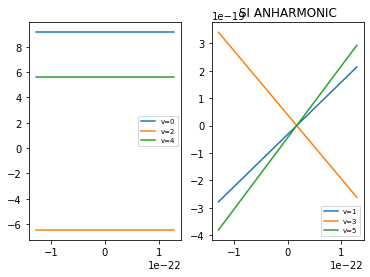

In [80]:
#Plotting the Wavefunctions SI
f,(ax, ax2) = plt.subplots(1, 2, facecolor = 'w')

ax.plot(mwc_H2_SI, psi_TOSH_SI_H2_0, label = 'v=0')
ax2.plot(mwc_H2_SI, psi_TOSH_SI_H2_1, label = 'v=1')
ax.plot(mwc_H2_SI, psi_TOSH_SI_H2_2, label = 'v=2')
ax2.plot(mwc_H2_SI, psi_TOSH_SI_H2_3, label = 'v=3')
ax.plot(mwc_H2_SI, psi_TOSH_SI_H2_4, label = 'v=4')
ax2.plot(mwc_H2_SI, psi_TOSH_SI_H2_5, label = 'v=5')

plt.title('SI ANHARMONIC')
legend = ax.legend(loc = 'best', fontsize = 'x-small')
legend = ax2.legend(loc = 'best', fontsize = 'x-small')

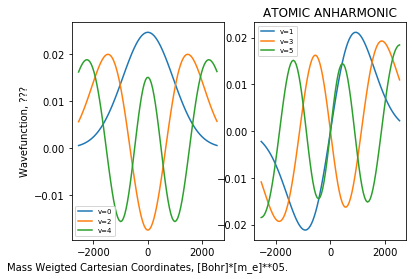

In [81]:
#Plotting the Wavefunctions ATOMIC
f,(ax, ax2) = plt.subplots(1, 2, facecolor = 'w')

ax.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_0, label = 'v=0')
ax2.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_1, label = 'v=1')
ax.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_2, label = 'v=2')
ax2.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_3, label = 'v=3')
ax.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_4, label = 'v=4')
ax2.plot(mwc_H2_ATOMIC, psi_TOSH_ATOMIC_H2_5, label = 'v=5')

plt.title('ATOMIC ANHARMONIC')
ax.set_ylabel('Wavefunction, ???')
ax.set_xlabel('Mass Weigted Cartesian Coordinates, [Bohr]*[m_e]**05.')
legend = ax.legend(loc = 'best', fontsize = 'x-small')
legend = ax2.legend(loc = 'best', fontsize = 'x-small')